In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
test = pd.read_csv("C:/Users/PC/Desktop/Kaggle/test.csv")
train = pd.read_csv("C:/Users/PC/Desktop/Kaggle/train.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#Llenamos los valores faltantes en edad en ambos data sets con la edad media
train['Age'] = train['Age'].fillna(train['Age'].median())
#Llenamos los valores nulos de Embarked con el vamos que mas se repite
train['Embarked'] = train['Embarked'].fillna('S')

In [8]:
#Llenamos los valores faltantes en edad en ambos data sets con la edad media
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna('S')

<Axes: xlabel='Survived,Sex'>

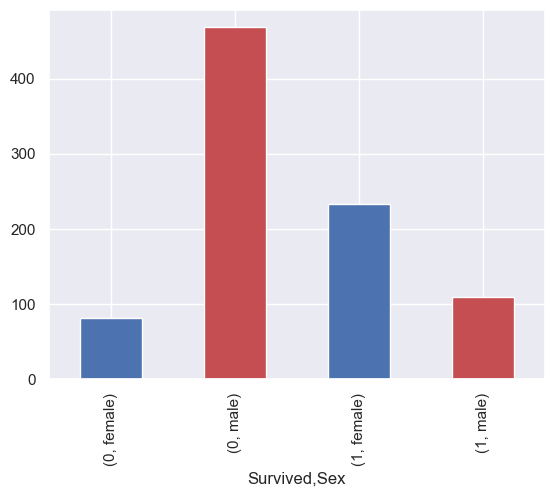

In [9]:
#Mostramos la cantidad de pasajeros que sobreviven segun el sexo del df Train
train[['Survived', 'Sex']].value_counts(sort=False).plot(kind='bar', color=('b', 'r'))

In [10]:
#Convertiremos el sexo en valores de 1 y 0 para ayuda del modelo
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
enconder_gender = label_encoder.fit_transform(train['Sex'])
train['Enconcer_gender'] = enconder_gender

In [11]:
#Lo mismo para test
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
enconder_gender = label_encoder.fit_transform(test['Sex'])
test['Enconcer_gender'] = enconder_gender

C:\Users\PC\AppData\Local\Temp\ipykernel_6680\1690498038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

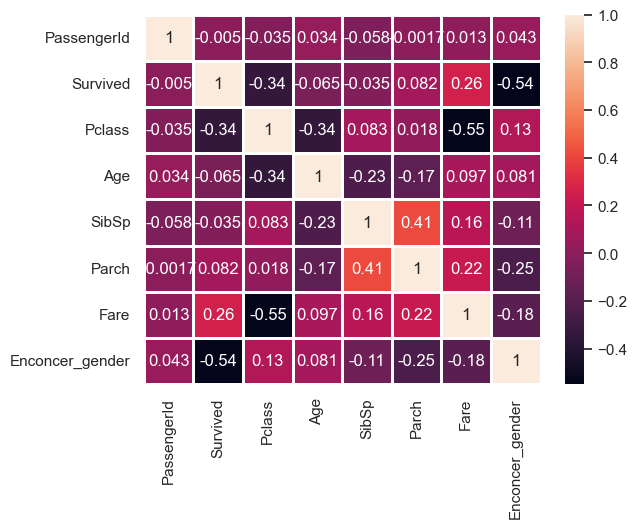

In [12]:
#Vemos la correlacion que existe entre las variables
corr = train.corr()
sns.heatmap(corr,annot=True, linewidths=1)

<Axes: xlabel='Survived,SibSp'>

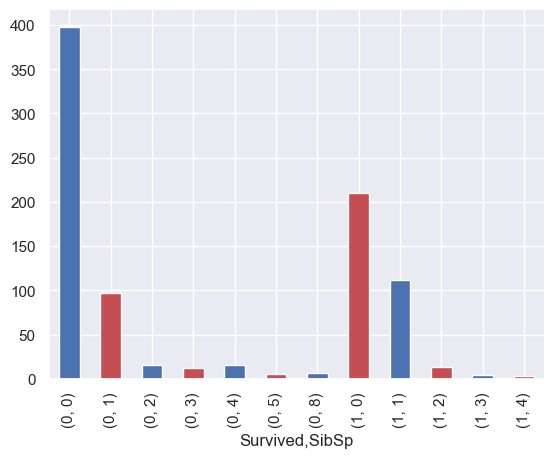

In [13]:
#Existe una correlacion entre si un pasajero tiene o no parientes
train[['Survived', 'SibSp']].value_counts(sort=False).plot(kind='bar', color=('b', 'r'))

<Axes: xlabel='Survived,Parch'>

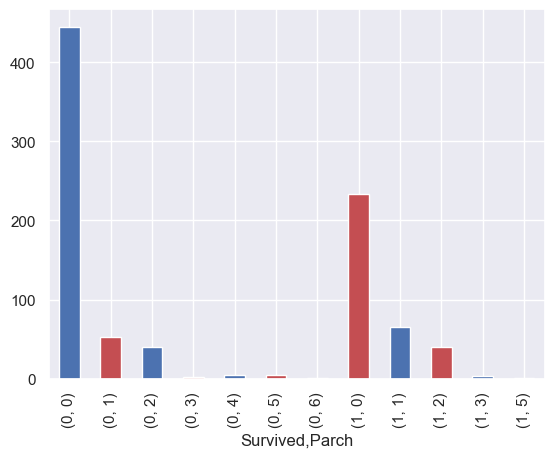

In [14]:
#Afecta si sobrevive o no la cantidad de parientes
train[['Survived', 'Parch']].value_counts(sort=False).plot(kind='bar', color=('b', 'r'))

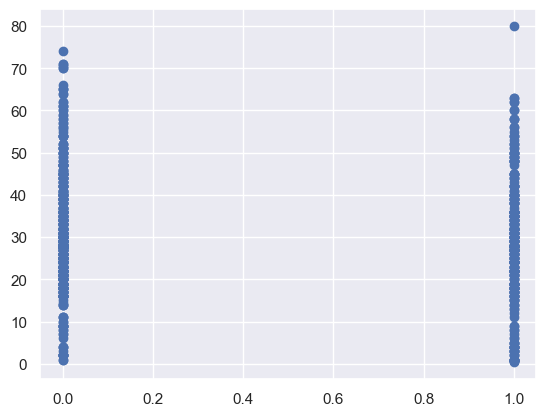

In [15]:
#Veremos si influye la edad al momento de sobrevivir
plt.scatter(train['Survived'], train['Age'])

In [16]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enconcer_gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [17]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enconcer_gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1


In [18]:
#Eliminamos las columnas que no usaremos en ambos data sets
train = train.drop(['PassengerId', 'Pclass','Name','Ticket','Cabin'], axis=1)
test = test.drop(['PassengerId', 'Pclass','Name','Ticket','Cabin'], axis=1)

In [19]:
#Creamos variables dummys para ambos data sets
dummy_train = pd.get_dummies(train)
dummy_test = pd.get_dummies(test)

In [20]:
dummy_train = dummy_train.drop(['Survived'], axis=1)

In [21]:
y_target = train['Survived'].values
x_features_one = dummy_train.values

In [22]:
#Definimos nuestros datos de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x_features_one, y_target,test_size=0.25,random_state=42)

In [23]:
#Definimos el modelo de prediccion que vamos a utilizar
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [24]:
 #La presicion del modelo
 print('Accuracy: ',tree_one.score(x_train,y_train))

Accuracy:  0.9805389221556886


In [25]:
y_pred = tree_one.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [26]:
#Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[104,  30],
       [ 25,  64]], dtype=int64)

In [27]:
# Crea un imputador con la estrategia deseada
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')



In [28]:
# Entrena el imputador en tus datos de entrenamiento
imputer.fit(x_train)


SimpleImputer()

In [29]:
# Aplica la imputación a tus datos de prueba "dummy_test"
dummy_test_imputed = imputer.transform(dummy_test)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [33]:
# Almacena las predicciones en una variable
y_pred2 = tree_one.predict(dummy_test_imputed)
y_pred2




array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,